# Industrial ecology open online course (IEooc)
## IEooc_Methods3_Software1: Dynamic stock modelling

Overview of how basic dynamic stock modelling with the Python class dynamic_stock_model works. First the installation of dynamic_stock_model is explained, and then a combination of inflow-driven and stock-driven modelling is demonstraded. For this tutorial the steel stock of China is estimated from historic data on final steel consumption (1900-2008) and then extrapolated with an exogenous saturation scenario (2009-2100)

For more info:
https://github.com/stefanpauliuk/dynamic_stock_model

### 1) Dynamic Stock Modelling in Python - Documentation and Tutorial


Dynamic models of material and product stocks require standard routines for computation. The dynamic_stock_model package offers a toolbox for computation and modification of dynamic stock models, including inflow-driven (van der Voet 2002) and stock-driven (Müller 2006) modelling.
This project is work in progress, and a first, unit-tested version is released on GitHub.
Below you find a quick tutorial and demonstration of the central feastures of the class DynamicStockModel.

### Dependencies

Python 3.0 or later <br>
numpy<br>
scipy<br>
matplotlib.pyplot<br>

### Installation and import

#### a) Installation from the web repository

This is the easiest way of installing dynamic\_stock\_model. Github hosts an installation package for dynamic\_stock\_model, which can be downloaded directly from the command line using pip:

    pip install dynamic_stock_model


#### b) Installation as package

Pull the package via git pull or download as .zip file and unpack. Choose a convenient location (Here: 'C:\MyPythonPackages\'). Then open a console, change to the directory ../dynamic\_stock\_model-master/, and install the package from the command line:

    python setup.py install

This makes the package available to Python. At any other place in a system with the same python installation, dynamic_stock_model is now ready to be imported simply by

    import dynamic_stock_model

This setup also allows us to run the unit test:

    import unittest

    import dynamic_stock_model

    import dynamic_stock_model.tests

    unittest.main(dynamic_stock_model.tests, verbosity=2)

Or, to run a specific test

    unittest.main(dynamic_stock_model.tests.test_known_results, verbosity=2)


#### c) Manual installation, by modifying the python path

Pull package via git pull or download as .zip file and unpack. Choose a convenient location (Here: 'C:\MyPythonPackages\'). 
The folder with the class is called dynamic\_stock\_model-master, and there is another folder named pydsm inside. The latter one contains the actual class, you can see this from the presence of \_\_init\_\_.py 
Then the class needs to be imported. This can be done by adding the path of the class file dynamic_stock_model.py to the system path, and to import the class from there:

In [1]:
import sys
sys.path.append('C:\\MyPythonPackages\\dynamic_stock_model-master\\dynamic_stock_model\\') 

Just put your own path in the command above, and use \\ for subfolders. Again, the paths needs to point to the folder where the \_\_init\_\_.py is located.
Now, the class can be imported:

In [2]:
from dynamic_stock_model import DynamicStockModel

Now, the class is ready to use. 

### Tutorial for simple inflow-driven model and stock-driven model

Below a combination of inflow-driven and stock-driven modelling is demonstraded. For this tutorial the steel stock of China is estimated from historic data on final steel consumption (1900-2008) and then extrapolated with an exogenous saturation scenario (2009-2100)

### 1. Load and check data

In [3]:
import xlrd

DSM_Datafile  = xlrd.open_workbook('IEooc_Methods3_Software1_Data.xlsx')
DSM_Datasheet = DSM_Datafile.sheet_by_name('Data_Steel_China')
Historic_Years = [] #years 1900 to 2008
Historic_Inflow = [] # apparent final steel consumption, China, kt/yr
Future_Years = [] # years 2009-2100
Future_Stock = [] # future scenario for the steel stock, China, kt
for m in range(2,111): # Read historic data
    Historic_Years.append(int(DSM_Datasheet.cell_value(m,2)))
    Historic_Inflow.append(DSM_Datasheet.cell_value(m,3))

for m in range(2,94): # Read future scenario
    Future_Years.append(int(DSM_Datasheet.cell_value(m,8)))
    Future_Stock.append(DSM_Datasheet.cell_value(m,9))

print(Historic_Years)

print(Future_Stock)

[1900, 1901, 1902, 1903, 1904, 1905, 1906, 1907, 1908, 1909, 1910, 1911, 1912, 1913, 1914, 1915, 1916, 1917, 1918, 1919, 1920, 1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008]
[3807600.0, 4275750.0, 4770570.0, 5287100.0, 5819790.0, 6362750.0, 6909990.0, 7455650.0, 7994100.0, 8520230.0, 9029470.0, 9517980.0, 9982660.0, 10421200.0, 10832000.0, 11214100.0, 11567200.0, 11891500.0, 12187600.0, 12456400.0, 12699100.0, 12917200.0, 13112000.0, 13285100.0, 13438000.0, 13572400.0, 13689600.0, 13791100.0, 13878200.0, 13952200.

### 2. Inflow-driven model 1900-2008
With these data we can now define a dynamic stock model by creating an instance of the DynamicStockModel class and assigning time, inflow, and lifetime. For the average product lifetime we chose a normally distributed lifetime with the mean of 30 years and a standard deviation of 30% of the mean.

In [4]:
import numpy as np
AvgLifetime = 30
China_DSM = DynamicStockModel(t = np.array(Historic_Years), i = np.array(Historic_Inflow), lt = {'Type': 'Normal', 'Mean': np.array([AvgLifetime]), 'StdDev': np.array([0.3*AvgLifetime]) })

Let's check the attributes of the object we just defined:

In [5]:
China_DSM.t

array([1900, 1901, 1902, 1903, 1904, 1905, 1906, 1907, 1908, 1909, 1910,
       1911, 1912, 1913, 1914, 1915, 1916, 1917, 1918, 1919, 1920, 1921,
       1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932,
       1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943,
       1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954,
       1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965,
       1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976,
       1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987,
       1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998,
       1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008])

In [6]:
China_DSM.i

array([  2.60000000e+01,   2.90000000e+01,   1.57635043e+01,
         3.87423153e+01,   3.85723027e+01,   3.13569960e+01,
         5.03099246e+01,   6.08170510e+01,   6.39341004e+01,
         7.12607152e+01,   1.15607140e+02,   7.98376013e+01,
         1.76963850e+02,   2.65406003e+02,   2.96802738e+02,
         3.34266175e+02,   3.67457455e+02,   3.55308305e+02,
         3.25261080e+02,   4.05685847e+02,   4.26032783e+02,
         3.88683728e+02,   3.95394039e+02,   3.37818541e+02,
         3.57777940e+02,   3.60627339e+02,   4.03735562e+02,
         4.33759667e+02,   4.73848478e+02,   4.32905718e+02,
         4.95383156e+02,   4.68038437e+02,   5.45120387e+02,
         6.05852533e+02,   6.52001544e+02,   7.73483457e+02,
         7.88729281e+02,   9.31200000e+02,   1.01870000e+03,
         1.10065000e+03,   1.15630000e+03,   1.49618773e+03,
         1.74098817e+03,   1.25485000e+03,   1.25135000e+03,
         1.81106208e+02,   1.33018720e+02,   5.58006610e+02,
         1.39678488e+02,

In [7]:
China_DSM.lt

{'Mean': array([30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30,
        30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30,
        30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30,
        30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30,
        30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30,
        30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30,
        30, 30, 30, 30, 30, 30, 30]),
 'StdDev': array([ 9.,  9.,  9.,  9.,  9.,  9.,  9.,  9.,  9.,  9.,  9.,  9.,  9.,
         9.,  9.,  9.,  9.,  9.,  9.,  9.,  9.,  9.,  9.,  9.,  9.,  9.,
         9.,  9.,  9.,  9.,  9.,  9.,  9.,  9.,  9.,  9.,  9.,  9.,  9.,
         9.,  9.,  9.,  9.,  9.,  9.,  9.,  9.,  9.,  9.,  9.,  9.,  9.,
         9.,  9.,  9.,  9.,  9.,  9.,  9.,  9.,  9.,  9.,  9.,  9.,  9.,
         9.,  9.,  9.,  9.,  9.,  9.,  9.,  9.,  9.,  9.,  9.,  9.,  9.,
         9.,  9.,  9.,  9.,  9.,  9.,  9.,  9.,  9

Regarding the attribute lt, you can see that the class automatically expands the lifetime distribution parameters from scalar to vector. <br>
At any time, we can determine a checkstring that describes the content of the TestDSM object:

In [8]:
CheckStr, ExitFlag = China_DSM.dimension_check()
print(CheckStr)

<br><b> Checking dimensions of dynamic stock model DSM.Time vector is present with 109 years.<br>Inflow vector is present with 109 years.<br>Total stock is not present.<br>Stock by cohorts is not present.<br>Total outflow is not present.<br>Outflow by cohorts is not present.<br>Lifetime distribution is present with type Normal and mean [30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30
 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30
 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30
 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30
 30 30 30 30 30 30 30 30 30].<br>


The check string comes in simple html format to be included in html logfiles. <br>
Now, we compute the stock s(t,t') of age-cohort t' in year t as
$$s(t,t') = i(t')\cdot(1-\sum_{t''=0}^{t-t'}\lambda(t'')) $$
Here, $\lambda(t'')$ is the probability function of discard at age $t''$. It is determined using the lifetime distribution type specified above. The full model is docomented here: http://pubs.acs.org/doi/suppl/10.1021/es201904c/suppl_file/es201904c_si_001.pdf <br>
The result is the stock, broken down by age-cohort:

In [9]:
Stock_by_cohort, ExitFlag = China_DSM.compute_s_c_inflow_driven()
print(Stock_by_cohort)
print(Stock_by_cohort.shape)

[[  2.60000000e+01   0.00000000e+00   0.00000000e+00 ...,   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [  2.59935870e+01   2.90000000e+01   0.00000000e+00 ...,   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [  2.59844696e+01   2.89928470e+01   1.57635043e+01 ...,   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 ..., 
 [  1.35205903e-02   1.50806584e-02   8.19738013e-03 ...,   3.41877191e+05
    0.00000000e+00   0.00000000e+00]
 [  1.35205903e-02   1.50806584e-02   8.19738013e-03 ...,   3.41792865e+05
    4.01813399e+05   0.00000000e+00]
 [  1.35205903e-02   1.50806584e-02   8.19738013e-03 ...,   3.41672980e+05
    4.01714290e+05   3.93609806e+05]]
(109, 109)


The dimension of the stock is 109x109. The row index is the model year, the column index is the age-cohort. <br>
The __'ExitFlag'__ parameter indicates the termination state of the method that was just called, here: compute_s_c_inflow_driven(). If everything went allright, the ExitFlag equals 1. If a problem occurred, the ExitFlag will have a different value, which indicates the source of the problem. To find out what exactly went wrong you need to open the class file pydsm.py and check the comments for the code for the method that just failed to produce a result. <br>
We continue by computing the total stock, the outflow by age-cohort, the total outflow, and the stock change:

In [10]:
S, ExitFlag   = China_DSM.compute_stock_total()
print(S)

[  2.60000000e+01   5.49935870e+01   7.07408209e+01   1.09456276e+02
   1.47981456e+02   1.79263454e+02   2.29462216e+02   2.90114932e+02
   3.53811219e+02   4.24736271e+02   5.39878072e+02   6.19071644e+02
   7.95170186e+02   1.05940632e+03   1.35463141e+03   1.68679686e+03
   2.05148800e+03   2.40319217e+03   2.72381502e+03   3.12360074e+03
   3.54217846e+03   3.92152128e+03   4.30531869e+03   4.62885205e+03
   4.96918030e+03   5.30864322e+03   5.68689132e+03   6.09016166e+03
   6.52778110e+03   6.91792009e+03   7.36316787e+03   7.77280909e+03
   8.25036478e+03   8.77854049e+03   9.34180531e+03   1.00145575e+04
   1.06896349e+04   1.14933978e+04   1.23700381e+04   1.33132403e+04
   1.42960096e+04   1.56019678e+04   1.71354129e+04   1.81648496e+04
   1.91725587e+04   1.90913862e+04   1.89433470e+04   1.92012131e+04
   1.90212438e+04   1.89203662e+04   1.95085076e+04   2.05330127e+04
   2.19934921e+04   2.37106535e+04   2.62498617e+04   2.94931114e+04
   3.36023998e+04   3.87508973e+04

In [11]:
O_C, ExitFlag = China_DSM.compute_o_c_from_s_c()
print(O_C)

[[  0.00000000e+00   0.00000000e+00   0.00000000e+00 ...,   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [  6.41302246e-03   0.00000000e+00   0.00000000e+00 ...,   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [  9.11738047e-03   7.15298659e-03   0.00000000e+00 ...,   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 ..., 
 [  0.00000000e+00   0.00000000e+00   1.75033599e-15 ...,   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00 ...,   8.43256193e+01
    0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00 ...,   1.19885555e+02
    9.91091673e+01   0.00000000e+00]]


In [12]:
O, ExitFlag   = China_DSM.compute_outflow_total()
print(O)

[  0.00000000e+00   6.41302246e-03   1.62703671e-02   2.68606461e-02
   4.71223714e-02   7.49982700e-02   1.11162634e-01   1.64334172e-01
   2.37814047e-01   3.35662752e-01   4.65339326e-01   6.44029428e-01
   8.65307778e-01   1.16986868e+00   1.57765088e+00   2.10071940e+00
   2.76632077e+00   3.60412695e+00   4.63823854e+00   5.90012516e+00
   7.45506164e+00   9.34090781e+00   1.15966307e+01   1.42851768e+01
   1.74496969e+01   2.11644102e+01   2.54874633e+01   3.04893301e+01
   3.62290361e+01   4.27667355e+01   5.01353677e+01   5.83972183e+01
   6.75646986e+01   7.76768223e+01   8.87367255e+01   1.00731247e+02
   1.13651902e+02   1.27437110e+02   1.42059724e+02   1.57447813e+02
   1.73530632e+02   1.90229578e+02   2.07543016e+02   2.25413352e+02
   2.43640838e+02   2.62278706e+02   2.81057914e+02   3.00140536e+02
   3.19647787e+02   3.39440233e+02   3.59653850e+02   3.80494862e+02
   4.02020639e+02   4.24338587e+02   4.47513122e+02   4.71769984e+02
   4.97211603e+02   5.24002483e+02

In [13]:
DS, ExitFlag  = China_DSM.compute_stock_change()
print(DS)

[  2.60000000e+01   2.89935870e+01   1.57472339e+01   3.87154546e+01
   3.85251803e+01   3.12819978e+01   5.01987620e+01   6.06527168e+01
   6.36962864e+01   7.09250525e+01   1.15141800e+02   7.91935719e+01
   1.76098542e+02   2.64236134e+02   2.95225087e+02   3.32165455e+02
   3.64691135e+02   3.51704178e+02   3.20622841e+02   3.99785722e+02
   4.18577721e+02   3.79342820e+02   3.83797409e+02   3.23533364e+02
   3.40328243e+02   3.39462929e+02   3.78248099e+02   4.03270337e+02
   4.37619442e+02   3.90138983e+02   4.45247788e+02   4.09641219e+02
   4.77555688e+02   5.28175711e+02   5.63264819e+02   6.72752210e+02
   6.75077379e+02   8.03762890e+02   8.76640276e+02   9.43202187e+02
   9.82769368e+02   1.30595815e+03   1.53344515e+03   1.02943665e+03
   1.00770916e+03  -8.11724980e+01  -1.48039195e+02   2.57866074e+02
  -1.79969299e+02  -1.00877585e+02   5.88141336e+02   1.02450514e+03
   1.46047936e+03   1.71716141e+03   2.53920824e+03   3.24324971e+03
   4.10928840e+03   5.14849752e+03

Now the dynamic stock is fully determined: Both stock and outflow are broken down by age-cohort and as total. We can make a final check by printing the dimension check and by computing the stock balance:

In [14]:
print(China_DSM.dimension_check()[0]) # dimension_check returns two variables, but we only print the first one, which has index 0.

<br><b> Checking dimensions of dynamic stock model DSM.Time vector is present with 109 years.<br>Inflow vector is present with 109 years.<br>Total stock is present with 109 years.<br>Stock by cohorts is present with 109 years and 109 cohorts.<br>Total outflow is present with 109 years.<br>Outflow by cohorts is present with 109 years and 109 cohorts.<br>Lifetime distribution is present with type Normal and mean [30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30
 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30
 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30
 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30
 30 30 30 30 30 30 30 30 30].<br>


In [15]:
Bal, ExitFlag = China_DSM.check_stock_balance()
print(Bal)

[  0.00000000e+00   0.00000000e+00  -7.10542736e-15   7.10542736e-15
  -7.10542736e-15  -7.10542736e-15   1.42108547e-14   0.00000000e+00
   3.55271368e-14  -4.26325641e-14  -7.10542736e-14   2.84217094e-14
   2.84217094e-14   1.13686838e-13  -1.13686838e-13   1.13686838e-13
  -4.54747351e-13   5.11590770e-13  -1.13686838e-13   5.68434189e-14
  -1.70530257e-13  -3.97903932e-13   1.13686838e-13  -1.70530257e-13
   7.95807864e-13   2.27373675e-13  -5.68434189e-14  -5.68434189e-13
  -1.13686838e-13   1.70530257e-13   3.97903932e-13  -2.27373675e-13
   4.54747351e-13   3.41060513e-13  -1.25055521e-12  -1.02318154e-12
   2.04636308e-12  -1.81898940e-12   7.95807864e-13   6.82121026e-13
   0.00000000e+00   2.27373675e-13  -1.81898940e-12  -1.13686838e-12
   9.09494702e-13   7.38964445e-13   8.24229573e-13  -2.89901436e-12
   2.84217094e-12   7.38964445e-13  -2.50111043e-12   0.00000000e+00
   2.72848411e-12   0.00000000e+00   2.27373675e-12  -2.72848411e-12
  -4.54747351e-12   9.09494702e-12

Let's make a few plots to see what happened:

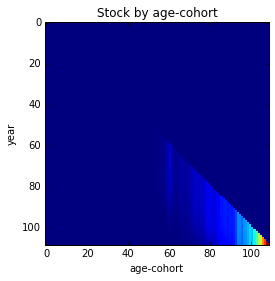

In [16]:
%matplotlib inline
# this is only for the IPython notebook, not part of the python script!

import matplotlib.pyplot as plt
plt.imshow(China_DSM.s_c, interpolation='nearest')
plt.xlabel('age-cohort')
plt.ylabel('year')
plt.title('Stock by age-cohort')
plt.show();

In the upper plot the upper triangle is always empty, as there are no age-cohorts from the future present in the stock. Since the stock is growing rapidly, the youngest age-cohorts dominate, and these are shown in the lower right corner of the plot.

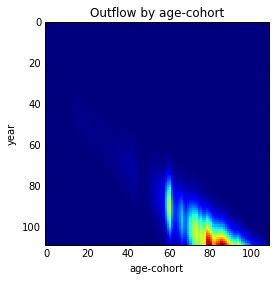

In [17]:
plt.imshow(China_DSM.o_c,interpolation='nearest')
plt.xlabel('age-cohort')
plt.ylabel('year')
plt.title('Outflow by age-cohort')
plt.show();

Above the age-cohorts that contribute most to the outflows around 2008 are those between age-cohorts 80 and 90 (1980-1990)

### 3. stock-driven model (2009-2100)

In stock-driven modelling, only the stock is known at first, and we want to know the inflow, the outflow, and the cohort structure of both stock and outflow. The DynamicStockModel class can do that. 

Here we not only have to solve the stock-driven model for future years but also take into account the stock as a result of historic consumption 1900-2008. There are several ways to do that (https://github.com/stefanpauliuk/dynamic_stock_model), and here we take a more elegant approach: We apply stock-driven modelling to the entire time series, starting from 1900, and concatenating the historic result and the future scenario. As the stock-driven model is the inverse operation of the flow-driven model the resulting inflow for the time 1900-2008 will be identical to the supplied input data provided that the exact same lifetime distribution is used.

In [18]:
China_Stock_Full = np.concatenate((S,Future_Stock), axis =0)
Time_Full        = np.concatenate((np.array(Historic_Years),np.array(Future_Years)), axis =0)

China_DSM_Full = DynamicStockModel(t = Time_Full, s = China_Stock_Full, lt = {'Type': 'Normal', 'Mean': np.array([AvgLifetime]), 'StdDev': np.array([0.3*AvgLifetime]) })
CheckStr, ExitFlag = China_DSM_Full.dimension_check()
print(CheckStr)

<br><b> Checking dimensions of dynamic stock model DSM.Time vector is present with 201 years.<br>Inflow is not present.<br>Total stock is present with 201 years.<br>Stock by cohorts is not present.<br>Total outflow is not present.<br>Outflow by cohorts is not present.<br>Lifetime distribution is present with type Normal and mean [30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30
 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30
 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30
 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30
 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30
 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30
 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30
 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30
 30].<br>


As above, we now call a sequence of methods to find all the missing information in the stock model. The central method for stock-driven modelling is __compute_stock_driven_model()__, which contains a recursive calculation starting from the fist year to determine outflow, inflow, and stock by cohorts using the lifetime model and the mass balance. The model is documented here:
http://pubs.acs.org/doi/suppl/10.1021/es201904c/suppl_file/es201904c_si_001.pdf

In [19]:
S_C, O_C, I, ExitFlag = China_DSM_Full.compute_stock_driven_model()
O, ExitFlag   = China_DSM_Full.compute_outflow_total()
DS, ExitFlag  = China_DSM_Full.compute_stock_change()
Bal, ExitFlag = China_DSM_Full.check_stock_balance()
print(Bal)

[  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00  -1.77635684e-14   4.26325641e-14  -2.13162821e-14
   1.42108547e-14   0.00000000e+00  -2.84217094e-14   1.42108547e-14
   2.84217094e-14   0.00000000e+00  -5.68434189e-14  -5.68434189e-14
   5.68434189e-14   0.00000000e+00  -1.70530257e-13   1.13686838e-13
   5.68434189e-14   1.13686838e-13  -1.70530257e-13  -6.25277607e-13
   9.09494702e-13  -8.52651283e-13   5.11590770e-13  -2.84217094e-13
  -4.54747351e-13   1.08002496e-12   5.68434189e-13  -1.02318154e-12
  -3.41060513e-13   0.00000000e+00  -9.09494702e-13   1.70530257e-12
  -1.02318154e-12   6.82121026e-13  -3.41060513e-13   1.13686838e-13
  -6.82121026e-13   0.00000000e+00  -2.27373675e-13   9.09494702e-13
  -3.41060513e-13   1.25055521e-12  -2.16004992e-12   2.95585778e-12
   2.84217094e-13   5.11590770e-13  -5.11590770e-12   0.00000000e+00
   3.18323146e-12  -4.54747351e-13  -1.81898940e-12   1.36424205e-12
  -9.09494702e-13   1.81898940e-12

Well, let's have a look at the result!

Below we plot stocks and flows on one axis by looking at the annual quantity represented by the flows (kt/yr --> kt for one year).

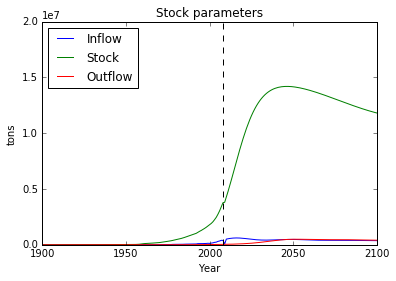

In [20]:
plt1, = plt.plot(China_DSM_Full.t, China_DSM_Full.i)
plt2, = plt.plot(China_DSM_Full.t, China_DSM_Full.s)
plt3, = plt.plot(China_DSM_Full.t, China_DSM_Full.o)
plt4, = plt.plot([2008,2008],[0,2e7], color = 'k', LineStyle = '--')
plt.xlabel('Year')
plt.ylabel('tons')
plt.title('Stock parameters')
plt.legend([plt1,plt2,plt3], ['Inflow','Stock','Outflow'], loc = 2)
plt.show();

We can see that the inflow of steel peaks around 2020, which is around the inflection point of the exogenous stock curve. The ditch in the inflow in 2009 is not a consequence of the economic crisis at that time but a result of the slight mismatch between the historic time series and the future scenario, as both were taken from different versions of the database when building this exercise. The outflow of steel peaks later, shortly after the steek stock itself will have peaked around 2040.

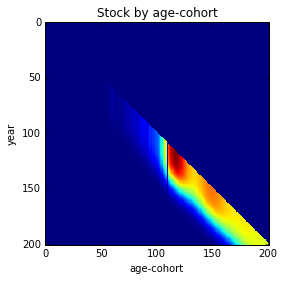

In [21]:
plt.imshow(China_DSM_Full.s_c,interpolation='nearest')
plt.xlabel('age-cohort')
plt.ylabel('year')
plt.title('Stock by age-cohort')
plt.show();

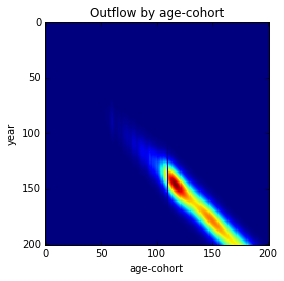

In [22]:
plt.imshow(China_DSM_Full.o_c,interpolation='nearest')
plt.xlabel('age-cohort')
plt.ylabel('year')
plt.title('Outflow by age-cohort')
plt.show();

We also need to check whether the model was able to reprodue the historic inflow:

In [23]:
FlowBal = China_DSM_Full.i[0:109] - Historic_Inflow
print(FlowBal)
print(np.abs(FlowBal).sum())

[  0.00000000e+00   0.00000000e+00   7.10542736e-15  -7.10542736e-15
   1.42108547e-14  -7.10542736e-15   2.13162821e-14  -2.13162821e-14
  -1.42108547e-14   4.26325641e-14   1.42108547e-14  -1.42108547e-14
   0.00000000e+00  -5.68434189e-14   5.68434189e-14  -1.70530257e-13
   4.54747351e-13  -5.11590770e-13   0.00000000e+00   0.00000000e+00
   2.27373675e-13   5.11590770e-13  -2.27373675e-13  -3.97903932e-13
   0.00000000e+00  -1.08002496e-12   5.11590770e-13   4.54747351e-13
  -5.11590770e-13   9.66338121e-13   1.70530257e-13  -9.09494702e-13
  -6.82121026e-13  -3.41060513e-13   4.54747351e-13   2.61479727e-12
  -3.06954462e-12   2.50111043e-12  -1.13686838e-12  -4.54747351e-13
  -6.82121026e-13  -2.27373675e-13   1.59161573e-12   2.27373675e-12
  -1.36424205e-12   5.11590770e-13  -3.15480975e-12   6.02540240e-12
  -2.44426701e-12  -2.84217094e-13  -3.06954462e-12   0.00000000e+00
   0.00000000e+00   0.00000000e+00  -4.09272616e-12   4.54747351e-12
   3.63797881e-12  -7.27595761e-12

This calculation confirms that the model works correctly. With the same lifetime distribution the historic apparent steel consumption is reproduced, and the difference between the two inflow time series (the original historic data and the re-calculated one from the stock-driven model) is practically zero.